<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2

### Problem Statement

I am part of a data team in a real estate company and we have been tasked to build a model that allows real estate agents to predict an accruate pricing for their clients. The model will also add extra values by providing features that would lead to highers sales price. We aim to develop a regression model that can accruately predict home prices in Ames, lowa.

## Contents:
- [Import and reading file](#Import-and-reading-file)
- [Modelling](#Modelling)
- [Data Dictionary](#Data-Dictionary)
- [Evaluation](#Evaluation)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Codes

In [38]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [39]:
#Setting default display settings
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 60)

## Import and reading file

In [40]:
#Reading housing_data.csv Files
housing_data = pd.read_csv('../Code/housing_data.csv' )
housing_data.head()




,id,overall_qual,year_built,year_remod/add,mas_vnr_area,exter_qual,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,kitchen_qual,totrms_abvgrd,fireplaces,garage_cars,garage_area,saleprice,lifespan,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone
0,109,6,1976,2005,289.0,2,533.0,725.0,725,1479,2,2,6,0,2.0,475.0,130500,34,0,1,0,0,0,0,0,1,0,0
1,544,7,1996,1997,132.0,2,637.0,913.0,913,2122,2,2,8,1,2.0,559.0,220000,13,0,0,1,0,0,0,0,1,0,0
2,153,5,1953,2007,0.0,1,731.0,1057.0,1057,1057,1,2,5,0,1.0,246.0,109000,57,0,1,0,0,0,0,0,0,1,0
3,318,5,2006,2007,0.0,1,0.0,384.0,744,1444,2,1,7,0,2.0,400.0,174000,4,0,0,1,0,0,0,0,0,1,0
4,255,6,1900,1993,0.0,1,0.0,676.0,831,1445,2,1,6,0,2.0,484.0,138500,110,0,0,1,0,0,0,0,0,1,0


In [41]:
#Reading testHousing_data.csv Files
testHousing_data = pd.read_csv('../Code/testHousing_data.csv' )
testHousing_data.head()


,id,overall_qual,year_built,year_remod/add,mas_vnr_area,exter_qual,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,kitchen_qual,totrms_abvgrd,fireplaces,garage_cars,garage_area,lifespan,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone
0,2658,6,1910,1950,0.0,1,0,1020,908,1928,2,0.0,9,0,1,440,96,0,0,0,0,1,0,0,0,1,0
1,2718,5,1977,1977,0.0,1,0,1967,1967,1967,2,1.0,10,0,2,580,29,0,1,0,0,0,0,0,0,1,0
2,2414,7,2006,2006,0.0,2,554,654,664,1496,2,2.0,7,1,2,426,0,0,0,1,0,0,0,0,0,1,0
3,1989,5,1923,2006,0.0,2,0,968,968,968,1,1.0,5,0,2,480,84,0,1,0,0,0,0,0,0,1,0
4,625,6,1963,1963,247.0,1,609,1394,1394,1394,1,1.0,6,2,2,514,46,0,1,0,0,0,0,0,1,0,0


In [42]:
housing_data.shape

(2029, 28)

In [43]:
testHousing_data.shape

(878, 27)

## Model Prep

In [44]:
#Creating Features Matrix (X) and target vector (y)
features = [col for col in housing_data._get_numeric_data().columns if col != 'saleprice']
X = housing_data[features]
y = housing_data['saleprice']

In [45]:
print('X: ', X.shape)
print('y: ', y.shape)

X:  (2029, 27)
y:  (2029,)


I started the model preparation by seperating the columns dataset that does not contains the target ('saleprice') and assigning it to X variable while variable Y i will be assigning the target which is the salesprice. I also checked to ensure both X and Y variable's row are consistent 

### Train Test Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [47]:
#After splitting the data (75/25)
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)


X_train:  (1521, 27)
y_train:  (1521,)
X_test:  (508, 27)


Next, i split the data further into Test and train data for both X and Y variable. The purpose of splitting the data set to evaluate how well my machine learning model performs. The train set is used to fit the model while the test data set is solely used for predictions. 

## Model Prep: Scaling

In [48]:
#Scaling data from housing_data(train.csv)
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)


Next I scaled the X train and test data to standardised my features of X individually before applying machine learning model. As such, each columns in X would have a mean of 0 and standard deviation of 1.  

In [49]:
lr = LinearRegression()

In [50]:
lasso = LassoCV(n_alphas=200)

In [51]:
ridge = RidgeCV(alphas=np.linspace(.1,10,100))

In [52]:
#Baseline Score (mean)
cross_val_score(lr,X,y).mean()

0.8108974559379136

## Cross Validation

In [53]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

0.7907337497916475

In [54]:
lr_scores = -cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error').mean()
print (lr_scores)

35271.12479360037


In [55]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

0.791320570966121

In [56]:
lasso_scores = -cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error').mean()
print (lasso_scores)

35605.778728583726


In [57]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.7908578230862108

In [58]:
ridge_scores = -cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error').mean()
print (ridge_scores)

35312.222805535144


I have also performed a cross validation across all 3 regression model to estimate the performance/accruacy for each of the machine learning models. As we look at the results, all 3 regression model displayed similar scores with a small difference of 0.001 (or 0.1%) . This indicates that there is no over/under fitting of data. To proceed further, i will be using Lasso Regression model as it has the highest score among the 3 regression. 

## Model Fitting and Evaluation

### Fitting Linear Regression 

In [59]:
#Fitting Linear regression
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('Lr R^2 Train score: ', r2_score(y_train, lr.predict(X_train)))
print('Lr R^2 Test score: ', r2_score(y_test, lr_pred))

Lr R^2 Train score:  0.8113616509448027
Lr R^2 Test score:  0.8558064206287028


In [60]:
#Checking the Root Mean Squared Error for Linear train and test set
print('Linear RMSE Train: ', mean_squared_error(y_train, lr.predict(X_train),squared=False))
print('Linear RMSE Test: ', mean_squared_error(y_test, lr_pred,squared=False))

Linear RMSE Train:  33932.79759001005
Linear RMSE Test:  30662.094874708084


### Fitting Lasso regression (Highest CV score)

In [61]:
#Fitting Lasso regression (Can break this into smaller print out)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print('Lasso R^2 Train score: ',r2_score(y_train, lasso.predict(X_train)))
print('Lasso R^2 Test score: ',r2_score(y_test, lasso_pred))


Lasso R^2 Train score:  0.8097531929629325
Lasso R^2 Test score:  0.8555702760142734


In [62]:
#Checking the Root Mean Squared Error for Lasso train and test set
print('Lasso RMSE Train: ', mean_squared_error(y_train, lasso.predict(X_train),squared=False))
print('Lasso RMSE Test: ', mean_squared_error(y_test, lasso_pred,squared=False))

Lasso RMSE Train:  34077.15749195792
Lasso RMSE Test:  30687.192131203876


### Fitting Ridge regression

In [63]:
#Fitting Ridge Regression
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test) 
print('Ridge R^2 Train Score: ', r2_score(y_train, ridge.predict(X_train)) )
print('Ridge R^2 Test Score: ',r2_score(y_test, ridge_pred) )


Ridge R^2 Train Score:  0.8103906938741596
Ridge R^2 Test Score:  0.8561139992095185


In [64]:
#Checking the Mean Squared Error for Ridge train and test set
print('Ridge RMSE Train: ',mean_squared_error(y_train, ridge.predict(X_train),squared=False))
print('Ridge RMSE Test: ', mean_squared_error(y_test, ridge_pred,squared=False))

Ridge RMSE Train:  34020.01474971919
Ridge RMSE Test:  30629.374838403415


For model fitting, i've fitted all 3 regression to have an overview of the accruacy (R^2) score for each model as well as their Root mean squared error. As we look at the R^2, we can determine that all 3 models returns an accruacy of 85% which is above my threshold of 80%. Ontop of that, for each of the regression R^2 train and test score, the different is only 0.046 or lower. This indicates that the models are quite accruate in the predictions against the actual sales price. 

Next we will look at the Root Mean Squared Error where the results is an indication of a range value of the prediciton error. All 3 regression RMSE are around 30000 - 36000 and the lower the RMSE, the better as this would indicate that the value of prediction error is smaller. 

For our specific Lasso Model, it scored a test accruacy (R^2) of 85.5% with a test RMSE score of 30687. This indicates a very high accruacy of our machine learning predictive model with the range error to be around 16% (RMSE/Saleprice mean = 30687/182631). This indicates that for every Sales price prediction, there will be a +/- 30687 potential range error ontop of the saleprice. 


## Data Dictionary:

|Method|R2 Score|RMSE Score|
|---|---|---| 
|Lasso Regression - Train|0.8097|34077| 
|Lasso Regression - Test|0.8555|30687
|Ridge Regression - Train|0.8103|34020|
|Ridge Regression - Test|0.8561|30629|
|Linear Regression - Train|0.8113|33932|
|Linear Regression - Test|0.8558|30662|


## Evaluation

In [65]:
#Sorting top 10 feature that can affect salesprice
lasso_coefs = pd.DataFrame({'variable': X.columns,
                            'coef': lasso.coef_,
                            'abs_coef': abs(lasso.coef_)})
lasso_coefs.sort_values('abs_coef',inplace=True, ascending=False)
lasso_coefs.head(10)

,variable,coef,abs_coef
1,overall_qual,19461.890307,19461.890307
9,gr_liv_area,14727.118994,14727.118994
5,exter_qual,9278.055343,9278.055343
11,kitchen_qual,8606.946815,8606.946815
4,mas_vnr_area,7300.239862,7300.239862
6,bsmtfin_sf_1,7105.232000,7105.232000
13,fireplaces,5969.040029,5969.040029
14,garage_cars,5399.747340,5399.747340
8,1st_flr_sf,4456.929779,4456.929779
15,garage_area,4343.522007,4343.522007


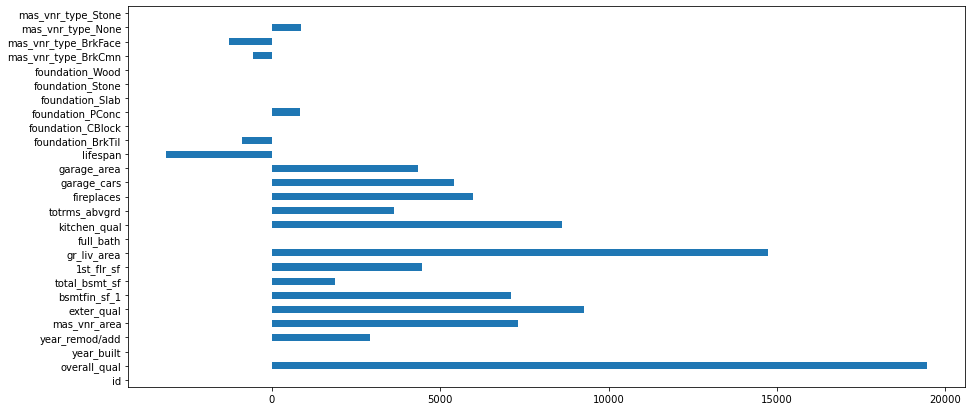

In [66]:
#Displaying the Correlation coefficient of the features

pd.Series(lasso.coef_, index=features).plot.barh(figsize=(15,7))
plt.show()

After predicting the price, we can also evaluate the coefficient of the Lasso model to determine which are the top features that could affect the sales price. As we look at the table, a unit movement of overall Quality would result in a shift of $19,461 in the saleprice. This is because there is a high positive correlation between the overall qualities of the house against the sales price. 

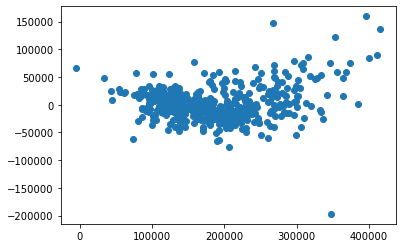

In [67]:
#Creating residual for lasso 
residual_lasso = y_test - lasso_pred
plt.scatter(x=lasso_pred,y=residual_lasso)
plt.show()


When we create the residual for lasso regression model, we are able to identify the price difference between the predicted value and the test value. As we plot the scatterplot above, we can see a large cluster of points hover around 0 for y axis. This indicates that for most of the price predicted, it is within +/-1 std deviation from the mean. This indicates that our model were able to predict the price range very closely to the mean with a small amount of outliers. 

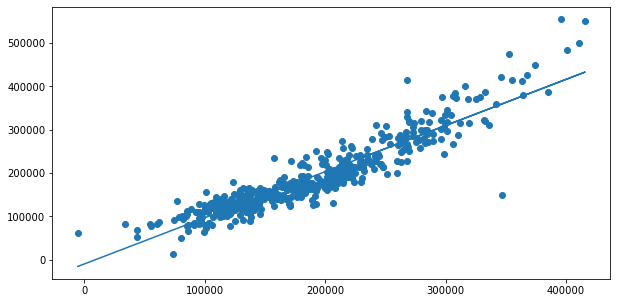

In [68]:
#True Value scatter plot
plt.figure(figsize=(10,5))
plt.scatter(x=lasso_pred, y=y_test)

m,b = np.polyfit(lasso_pred,y_test,1)
plt.plot(lasso_pred, m*lasso_pred+b)

The residual scatterplot and the true value scatterplot is slightly different. As the Residual scatterplot is used to determine the predicted price against the **different** between predicted price and actual price. 

While for true value scatter plot, we are displaying both predicted price and actual value. Then i include the line of best fit to show how far each plot is away from the mean. Ideally what i want to see is majority of the plots to be close to the line with little to no outliers. So for the scatterplot, we can clearly see that for saleprice below 300k are generally very close to the line. While the amount above 300k have a larger spread between the plot and the line. This could be due to lack of data for saleprice above 350k.




### Optimal Value

In [69]:
#Finding optimal value for Ridge regression alpha
%time
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_train, y_train)

print (optimal_ridge.alpha_)

CPU times: user 14 µs, sys: 1 µs, total: 15 µs
Wall time: 5.01 µs
193.38917504552322


## Model Prep: Scaling and Prediction for testHousing_data

In [70]:
housing_data.shape

(2029, 28)

In [71]:
testHousing_data.shape

(878, 27)

In [72]:
#Checking for null value
testHousing_data.isnull().sum().sort_values(ascending=False).head(22)
testHousing_data['kitchen_qual'] = testHousing_data['kitchen_qual'].fillna(0.0)
testHousing_data.isnull().sum().sort_values(ascending=False).head(11)

id                      0
garage_cars             0
mas_vnr_type_None       0
mas_vnr_type_BrkFace    0
mas_vnr_type_BrkCmn     0
foundation_Wood         0
foundation_Stone        0
foundation_Slab         0
foundation_PConc        0
foundation_CBlock       0
foundation_BrkTil       0
dtype: int64

In [73]:
#Scaling data from testHousing_data (test.csv)
test_s = ss.transform(testHousing_data) 



As i've already fit the scaling model with the housing_data (train.csv) set, I would only need to apply scaling tranform on the test data to ensure that the scaling is similar. 

In [74]:
#Model predictions for testHousing_data(test.csv)
y_prediction = lasso.predict(test_s)
y_prediction.shape

(878,)

While most of the modelling above are done for the housing_data(train.csv) set, i would also need to apply the same scaling, model predictions as well as little adjustments for missing values to ensure i can use the model to predict the actual test dataset (testHousing_data or test.csv)

In [75]:
#Passing the y_predictions into a dataframe
saleprice_predict = pd.DataFrame(y_prediction, columns=['saleprice'])
saleprice_id = pd.DataFrame(testHousing_data['id'])

final_saleprice = pd.concat([saleprice_id,saleprice_predict], axis=1)

#Converting to CSV file 
final_saleprice.to_csv('final_saleprice.csv', index=False)




Last but not least, i will predict the sales price from the testhousing_data(test.csv) dataset on a dataframe and concatenate the ID to the salesprice. Next i will export the dataframe into csv file where i would upload the csv file on kaggle. 

## Conclusion and recommendation 

**Conclusion**

Features such as overall condition of the property, ground living area, external quality, kitchen quality and Masonry veneer area are highly correlated to the sales price. This indicates that generally buyers/sellers who focus on these aspect have a higher chance in selling the property at a higher price. While the 3 regression model were able to predict price at a high accruacy, there is a requirement to obtain more data and constantly update the features as more and more young adults are becoming homebuyers which may have a different view of features in relation to features. On top of that, although the accruacy is above benchmark of 80%, collection of more data may help in providing more insight leading to better results. Homesellers who aims to sell the house can also be remainded that the long the property is held without remodifications, the lower the future salesprice they might receive. 

**Recommendation**

- Sellers of the property is to look into the key features that could result in selling the properties at a higher price. 
- While for speculative buyers, they can look into features that leads to a lower sales price and focus on remodifying the key features  in hope for a good chance to flip the property at a profit. 

- I would also recommend for the data collection to make the answers for survey/data entry mandatory to avoid having a large amount of empty values which might lead to low correlation/skewed result. 

- I would also include interest rates data/government intervention(eg: ABSD for Singapore) to see if there is a strong correlation between higher mortgage rates with lower property price. The rational for such idea is to see if higher mortgage rate would reduce the demand of properties which may lead to a drop in prices. 


